# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

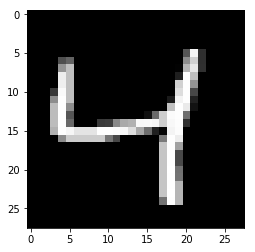

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [14]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

inputs_ = tf.placeholder(tf.float32, shape=(None, 784))
targets_ = tf.placeholder(tf.float32, shape=(None, 784))

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim)

# Output layer logits
logits = tf.layers.dense(encoded, targets_.shape[1], activation=tf.nn.relu)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, activation=None)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [15]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [16]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6925
Epoch: 1/20... Training loss: 0.6867
Epoch: 1/20... Training loss: 0.6808
Epoch: 1/20... Training loss: 0.6725
Epoch: 1/20... Training loss: 0.6635
Epoch: 1/20... Training loss: 0.6560
Epoch: 1/20... Training loss: 0.6357
Epoch: 1/20... Training loss: 0.6310
Epoch: 1/20... Training loss: 0.6188
Epoch: 1/20... Training loss: 0.5998
Epoch: 1/20... Training loss: 0.5811
Epoch: 1/20... Training loss: 0.5664
Epoch: 1/20... Training loss: 0.5453
Epoch: 1/20... Training loss: 0.5317
Epoch: 1/20... Training loss: 0.5117
Epoch: 1/20... Training loss: 0.4938
Epoch: 1/20... Training loss: 0.4749
Epoch: 1/20... Training loss: 0.4647
Epoch: 1/20... Training loss: 0.4463
Epoch: 1/20... Training loss: 0.4207
Epoch: 1/20... Training loss: 0.4063
Epoch: 1/20... Training loss: 0.3933
Epoch: 1/20... Training loss: 0.3862
Epoch: 1/20... Training loss: 0.3881
Epoch: 1/20... Training loss: 0.3700
Epoch: 1/20... Training loss: 0.3554
Epoch: 1/20... Training loss: 0.3487
E

Epoch: 1/20... Training loss: 0.2100
Epoch: 1/20... Training loss: 0.2108
Epoch: 1/20... Training loss: 0.2134
Epoch: 1/20... Training loss: 0.2091
Epoch: 1/20... Training loss: 0.2145
Epoch: 1/20... Training loss: 0.2085
Epoch: 1/20... Training loss: 0.2122
Epoch: 1/20... Training loss: 0.2102
Epoch: 1/20... Training loss: 0.2019
Epoch: 1/20... Training loss: 0.2051
Epoch: 1/20... Training loss: 0.2166
Epoch: 1/20... Training loss: 0.2274
Epoch: 1/20... Training loss: 0.2046
Epoch: 1/20... Training loss: 0.2135
Epoch: 1/20... Training loss: 0.2116
Epoch: 1/20... Training loss: 0.2142
Epoch: 1/20... Training loss: 0.2053
Epoch: 1/20... Training loss: 0.2020
Epoch: 1/20... Training loss: 0.2197
Epoch: 1/20... Training loss: 0.2092
Epoch: 1/20... Training loss: 0.2193
Epoch: 1/20... Training loss: 0.2078
Epoch: 1/20... Training loss: 0.2116
Epoch: 1/20... Training loss: 0.1959
Epoch: 1/20... Training loss: 0.2055
Epoch: 1/20... Training loss: 0.2075
Epoch: 1/20... Training loss: 0.2036
E

Epoch: 2/20... Training loss: 0.1698
Epoch: 2/20... Training loss: 0.1734
Epoch: 2/20... Training loss: 0.1662
Epoch: 2/20... Training loss: 0.1726
Epoch: 2/20... Training loss: 0.1717
Epoch: 2/20... Training loss: 0.1665
Epoch: 2/20... Training loss: 0.1649
Epoch: 2/20... Training loss: 0.1677
Epoch: 2/20... Training loss: 0.1788
Epoch: 2/20... Training loss: 0.1695
Epoch: 2/20... Training loss: 0.1714
Epoch: 2/20... Training loss: 0.1715
Epoch: 2/20... Training loss: 0.1737
Epoch: 2/20... Training loss: 0.1746
Epoch: 2/20... Training loss: 0.1710
Epoch: 2/20... Training loss: 0.1670
Epoch: 2/20... Training loss: 0.1746
Epoch: 2/20... Training loss: 0.1754
Epoch: 2/20... Training loss: 0.1739
Epoch: 2/20... Training loss: 0.1739
Epoch: 2/20... Training loss: 0.1633
Epoch: 2/20... Training loss: 0.1665
Epoch: 2/20... Training loss: 0.1707
Epoch: 2/20... Training loss: 0.1687
Epoch: 2/20... Training loss: 0.1712
Epoch: 2/20... Training loss: 0.1693
Epoch: 2/20... Training loss: 0.1687
E

Epoch: 3/20... Training loss: 0.1474
Epoch: 3/20... Training loss: 0.1476
Epoch: 3/20... Training loss: 0.1551
Epoch: 3/20... Training loss: 0.1450
Epoch: 3/20... Training loss: 0.1487
Epoch: 3/20... Training loss: 0.1479
Epoch: 3/20... Training loss: 0.1479
Epoch: 3/20... Training loss: 0.1456
Epoch: 3/20... Training loss: 0.1507
Epoch: 3/20... Training loss: 0.1485
Epoch: 3/20... Training loss: 0.1482
Epoch: 3/20... Training loss: 0.1517
Epoch: 3/20... Training loss: 0.1468
Epoch: 3/20... Training loss: 0.1491
Epoch: 3/20... Training loss: 0.1487
Epoch: 3/20... Training loss: 0.1431
Epoch: 3/20... Training loss: 0.1461
Epoch: 3/20... Training loss: 0.1475
Epoch: 3/20... Training loss: 0.1425
Epoch: 3/20... Training loss: 0.1462
Epoch: 3/20... Training loss: 0.1485
Epoch: 3/20... Training loss: 0.1431
Epoch: 3/20... Training loss: 0.1459
Epoch: 3/20... Training loss: 0.1448
Epoch: 3/20... Training loss: 0.1408
Epoch: 3/20... Training loss: 0.1454
Epoch: 3/20... Training loss: 0.1499
E

Epoch: 4/20... Training loss: 0.1307
Epoch: 4/20... Training loss: 0.1342
Epoch: 4/20... Training loss: 0.1348
Epoch: 4/20... Training loss: 0.1379
Epoch: 4/20... Training loss: 0.1329
Epoch: 4/20... Training loss: 0.1338
Epoch: 4/20... Training loss: 0.1378
Epoch: 4/20... Training loss: 0.1378
Epoch: 4/20... Training loss: 0.1295
Epoch: 4/20... Training loss: 0.1327
Epoch: 4/20... Training loss: 0.1285
Epoch: 4/20... Training loss: 0.1307
Epoch: 4/20... Training loss: 0.1334
Epoch: 4/20... Training loss: 0.1370
Epoch: 4/20... Training loss: 0.1326
Epoch: 4/20... Training loss: 0.1319
Epoch: 4/20... Training loss: 0.1335
Epoch: 4/20... Training loss: 0.1343
Epoch: 4/20... Training loss: 0.1392
Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1338
Epoch: 4/20... Training loss: 0.1361
Epoch: 4/20... Training loss: 0.1339
Epoch: 4/20... Training loss: 0.1346
Epoch: 4/20... Training loss: 0.1345
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1311
E

Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1317
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1300
Epoch: 4/20... Training loss: 0.1188
E

Epoch: 5/20... Training loss: 0.1163
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1182
Epoch: 5/20... Training loss: 0.1174
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1171
Epoch: 5/20... Training loss: 0.1163
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1195
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1175
Epoch: 5/20... Training loss: 0.1162
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1174
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1184
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1160
E

Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1099
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.1110
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1117
Epoch: 6/20... Training loss: 0.1121
Epoch: 6/20... Training loss: 0.1098
Epoch: 6/20... Training loss: 0.1117
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1125
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1115
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1114
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1113
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1121
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1102
Epoch: 6/20... Training loss: 0.1098
Epoch: 6/20... Training loss: 0.1083
E

Epoch: 7/20... Training loss: 0.1085
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1060
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1069
Epoch: 7/20... Training loss: 0.1074
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1053
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1083
Epoch: 7/20... Training loss: 0.1062
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1062
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1051
Epoch: 7/20... Training loss: 0.1073
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1032
E

Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0969
Epoch: 7/20... Training loss: 0.0966
Epoch: 7/20... Training loss: 0.0969
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0947
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0964
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1003
E

Epoch: 8/20... Training loss: 0.0926
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.1029
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.1028
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.1029
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.0944
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0988
E

Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0929
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.1004
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0915
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0959
E

Epoch: 10/20... Training loss: 0.0911
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.1004
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0921
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.1005
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0900
Epoch: 10/20... Training loss: 0.0991
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0895
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.1003
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0908
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0902
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0894
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0990
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0986
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0892
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0892
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0993
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0893
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0889
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.1000
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0897
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0902
Epoch: 14/20... Training loss: 0.0976
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0889
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0890
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0883
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0890
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0892
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0976
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0894
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0896
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0872
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0887
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0886
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0900
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0884
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0891
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

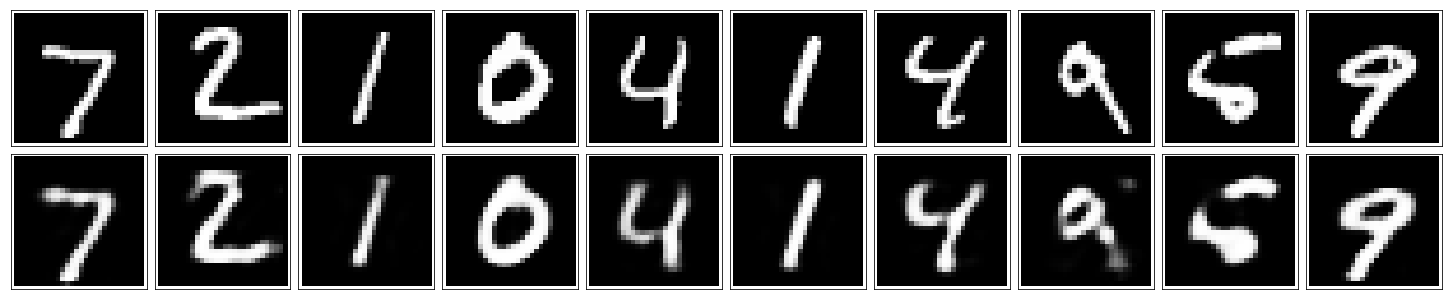

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [18]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.